In [1]:
%matplotlib inline
import pandas as pd



df = pd.read_csv('edited_train.csv')
DD = pd.read_csv('DD.csv')

In [2]:
df = pd.merge(df, DD, on='VisitNumber')

In [3]:
TT = df.groupby('TripType').median()

In [4]:
TT.head()

,VisitNumber,refund,purchase,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,...,DepartmentDescription_SEAFOOD,DepartmentDescription_SEASONAL,DepartmentDescription_SERVICE DELI,DepartmentDescription_SHEER HOSIERY,DepartmentDescription_SHOES,DepartmentDescription_SLEEPWEAR/FOUNDATIONS,DepartmentDescription_SPORTING GOODS,DepartmentDescription_SWIMWEAR/OUTERWEAR,DepartmentDescription_TOYS,DepartmentDescription_WIRELESS
TripType,,,,,,,,,,,,,,,,,,,,,
3,84938.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,76820.5,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,92116.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,97124.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,98896.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


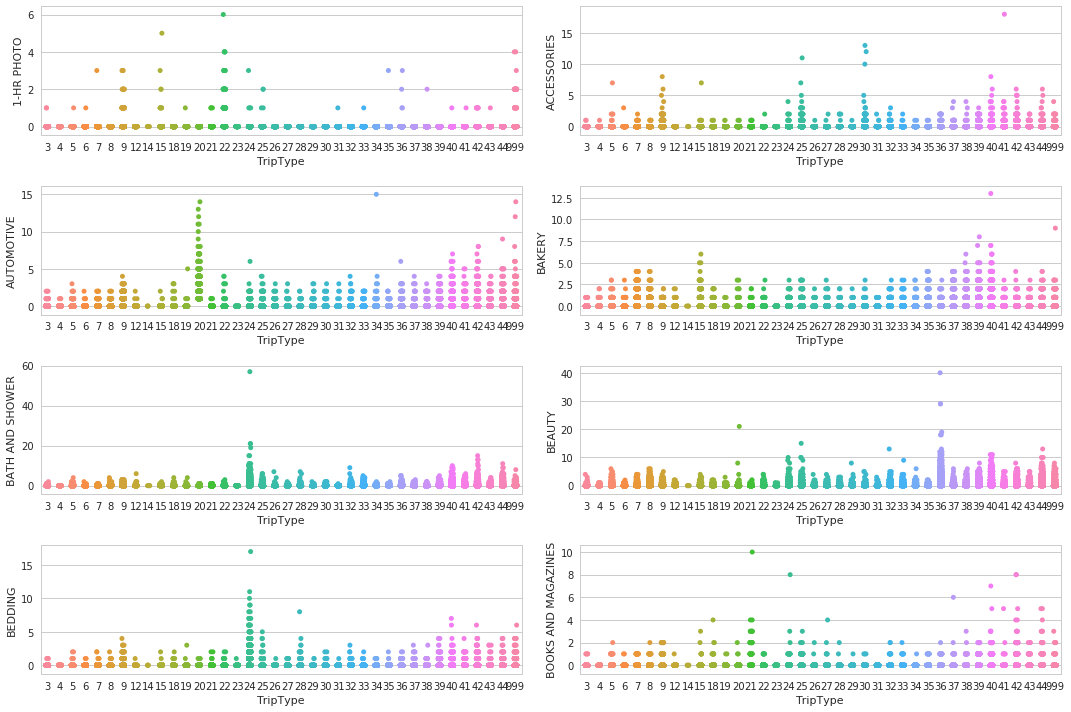

In [5]:
f1 = plt.figure(figsize=(15,10))
for i in range(0, 8):
    a = '42' + '{}'.format(i+1)
    plt.subplot(a)
    sns.stripplot(x=df.TripType,y=df.iloc[:, i+11], data=df, jitter=True)
    plt.ylabel(df.columns[i+11][22:])
    
plt.tight_layout()
plt.show()

In [6]:
mh = pd.read_csv('Musthave_by_FinelineNumber.csv')

대상 컬럼 - ['FinelineNumber', 'DepartmentDescription', 'company_code', 'product_code']

1. 상품별 평균 판매량이 일정 수치 `이상`인 상품 제거 ( 모든 고객이 공통적으로 구매하는 상품)
1. 남아 있는 상품 중, `TripType` 별로 1개 이상 구매한 `상품 리스트`체크
1. `상품 리스트`에 있는 상품을 각 고객이 산 갯수 카운트


In [8]:
mh.tail()

,VisitNumber,TripType_3,TripType_4,TripType_5,TripType_6,TripType_7,TripType_8,TripType_9,TripType_12,TripType_14,...,TripType_36,TripType_37,TripType_38,TripType_39,TripType_40,TripType_41,TripType_42,TripType_43,TripType_44,TripType_999
95669,191343,6.0,6.0,6.0,7.0,9.0,4.0,9.0,9.0,1.0,...,8.0,7.0,7.0,9.0,9.0,8.0,9.0,9.0,9.0,0.0
95670,191344,3.0,3.0,4.0,3.0,3.0,4.0,5.0,0.0,0.0,...,4.0,0.0,4.0,5.0,4.0,4.0,5.0,3.0,5.0,0.0
95671,191345,8.0,2.0,15.0,5.0,13.0,10.0,7.0,9.0,0.0,...,14.0,13.0,13.0,17.0,17.0,13.0,17.0,11.0,17.0,4.0
95672,191346,1.0,4.0,14.0,11.0,17.0,14.0,14.0,10.0,0.0,...,15.0,16.0,17.0,17.0,16.0,11.0,14.0,15.0,17.0,0.0
95673,191347,0.0,0.0,2.0,1.0,2.0,2.0,1.0,1.0,0.0,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,0.0
